## SENTIMENT ANALYSIS ON TWITTER COMMENTS

## importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras_preprocessing.text import Tokenizer
import keras
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense
from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
import datetime
from keras.callbacks import TensorBoard

## loading dataset

In [2]:
dataset= pd.read_csv("Tweets.csv")
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Preparing the datasets

In [3]:
dataset.columns ## checking through the columns to decide the needed one for the analysis


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
## the text and the airline_sentiment will only be used for the purpose of this study.
dataset = dataset[['text', 'airline_sentiment']]
dataset.head(5)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
## intend to predict positive or negative, neutral is not relevant, so it will be removed.
dataset = dataset[dataset['airline_sentiment'] != 'neutral'] 

## dataset after cleaning
dataset.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [6]:
dataset['airline_sentiment'].value_counts() ## counts of positive to negative

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='Count'>

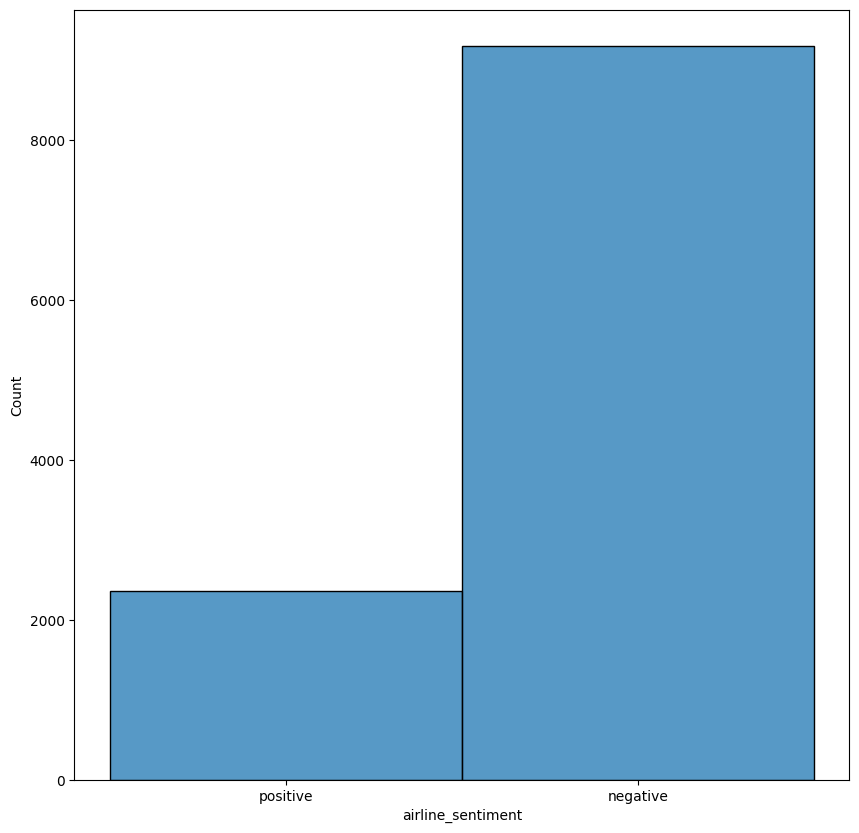

In [7]:
## plotting the histogram distribution of the label
fig= plt.figure(figsize = (10, 10))
sns.histplot(data = dataset, x = 'airline_sentiment')


## Tokenizing the text to Numerical values

In [8]:
number_words = 7000
tokenizer = Tokenizer(num_words=number_words, split=' ')
tokenizer.fit_on_texts(dataset['text'].values)
vocab_size = len(tokenizer.word_index) + 1
X = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X) ## the text has been converted to numerical values


y = pd.get_dummies(dataset['airline_sentiment']).values ## the labels has been converted to numerical values

In [9]:
X

array([[   0,    0,    0, ...,    2,  177, 5709],
       [   0,    0,    0, ...,   25,  482, 2417],
       [   0,    0,    0, ...,  483,   86,   21],
       ...,
       [   0,    0,    0, ...,    8,    1,  480],
       [   0,    0,    0, ..., 1682,   45,  945],
       [   0,    0,    0, ...,  144,   11, 2325]], dtype=int32)

In [10]:
y

array([[False,  True],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [ True, False],
       [ True, False]])

## Splitting Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape,y_train.shape) ## printing the shape of the train set
print(X_test.shape,y_test.shape) ## training the shape of the test set

(9232, 34) (9232, 2)
(2309, 34) (2309, 2)


## Defining the model

In [12]:
embedded_dim = 32
model =tf.keras.models.Sequential()
model.add(Embedding(vocab_size , embedded_dim, input_length = X.shape[1])) ## lowering the dimensionality of categorical variables
model.add(SpatialDropout1D(0.25)) ## 
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2)) ## regularizing to creates a robust network
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) ## multi class classification
model.summary()




/Users/tes/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Creating the tensorboard logger

In [13]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

log_dir = "logs/fit/" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq = 1)

In [14]:
## training will be done on 50 epochs
history = model.fit(X_train, y_train, epochs = 50, validation_data =(X_test, y_test), callbacks=[tensorboard_callback])



Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7978 - loss: 0.4987 - val_accuracy: 0.8904 - val_loss: 0.2657
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8984 - loss: 0.2595 - val_accuracy: 0.9242 - val_loss: 0.2116
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9311 - loss: 0.1864 - val_accuracy: 0.9272 - val_loss: 0.2009
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9468 - loss: 0.1452 - val_accuracy: 0.9303 - val_loss: 0.1911
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9537 - loss: 0.1330 - val_accuracy: 0.9324 - val_loss: 0.2114
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9651 - loss: 0.0964 - val_accuracy: 0.9307 - val_loss: 0.2068
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9675 - loss: 0.0919 - val_accuracy: 0.9251 - val_loss: 0.2277
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9721 - loss: 0.0806 - val_accu

## Training the model

## visualizing the accuracy and loss

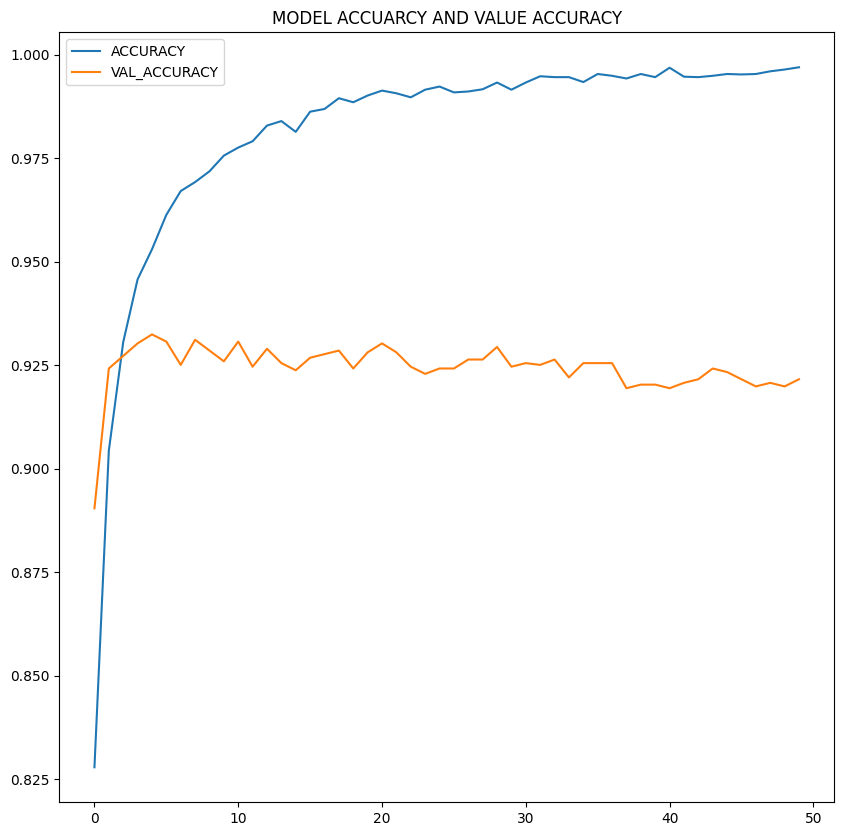

In [15]:
#Plotting a histogram over the 50 epocs and plotting the accuracy and value accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"], label = 'ACCURACY')
plt.plot(history.history["val_accuracy"], label = 'VAL_ACCURACY')
plt.title("MODEL ACCUARCY AND VALUE ACCURACY")
plt.legend()
plt.show()

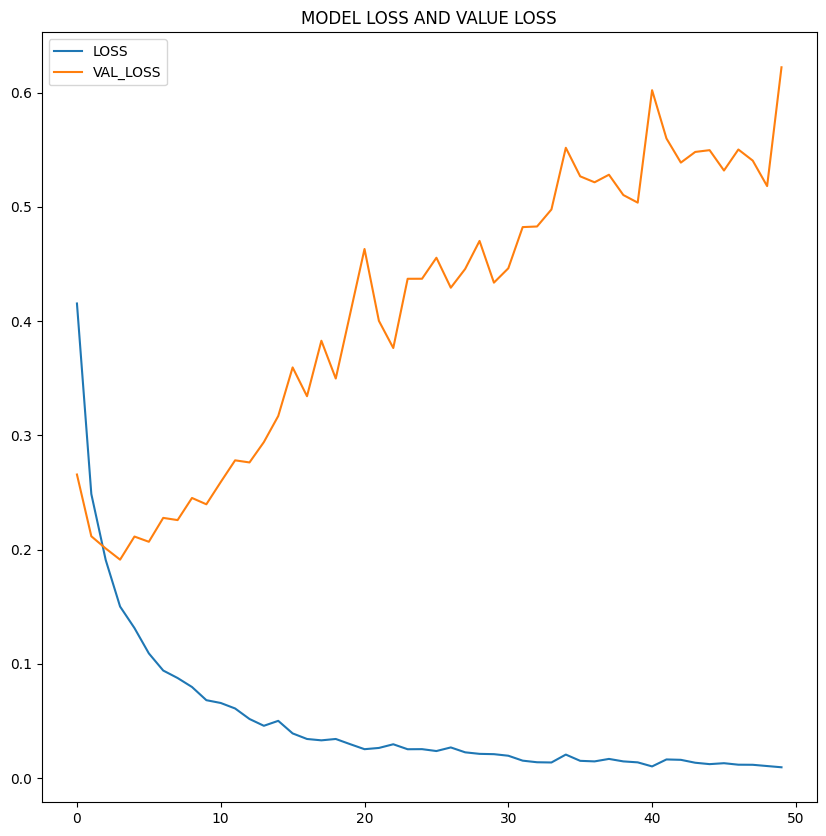

In [16]:
#Plotting a histogram over the 50 epocs and plotting the loss and val_loss
plt.figure(figsize=(10,10))
plt.plot(history.history["loss"], label = 'LOSS')
plt.plot(history.history["val_loss"], label = 'VAL_LOSS')
plt.title("MODEL LOSS AND VALUE LOSS")
plt.legend()
plt.show()

## Testing the model mean squared error

In [17]:
test_error_rate = model.evaluate(X_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: [0.6221718192100525, 0.9216110706329346]


## Prediction on a Random Sample from the twitter comments

In [18]:
#now testing  on a random sample from the twitter comments 
comment = ["the best flight ever"]
#vectorizing the comment
comment = tokenizer.texts_to_sequences(comment)
comment = pad_sequences(comment, maxlen=34, dtype='int32', value=0)
print(comment) ## print the epoch

sentiment = model.predict(comment,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   2 206   8 152]]
1/1 - 0s - 176ms/step
positive


In [19]:
#now testing  on a random sample from the twitter comments: 
comment = ["the worst flight ever"]
#vectorizing the comment
comment = tokenizer.texts_to_sequences(comment)
comment = pad_sequences(comment, maxlen=34, dtype='int32', value=0)
print(comment) ## print the epoch

sentiment = model.predict(comment,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   2 149   8 152]]
1/1 - 0s - 14ms/step
negative
